## Cardiovascular Disease Dataset
    This is a  Kaggle deatset from a hospital in India. The cardiovascular disease dataset contains 1,000 subjects and 14 clinically relevant features used to assess heart disease risk. These features represent demographic factors (age, gender), symptoms (chest pain type, exercise-induced angina), physiological measurements (resting blood pressure, serum cholesterol), and diagnostic test results (ECG findings, ST depression, slope, major vessels). Many of these features are known indicators of cardiovascular health. For example, high resting blood pressure (>140 mmHg), elevated cholesterol (>240 mg/dL), and fasting blood sugar >120 mg/dL all contribute to atherosclerosis and increase heart disease risk. Clinical markers such as ST depression (oldpeak), abnormal ECG changes, and exercise-induced chest pain are direct signs of reduced blood flow to the heart. For each feature, normal ranges and their relation to heart disease can be evaluated during exploratory data analysis (EDA) to understand which variables show strong separation between healthy and diseased patients.
    Work on the dataset will involve:
        - Cleaning dataset
        - Feature selection
        - model testing and selection
        - model evaluation
        - deployment of the model in docker
        

### Description of the Dataset
     Age 
    - Heart diseas risk rises sharply after the age of 45 in men and 55 in women hence an important predictor of cardivascular disease
    Gender
    - male and female
    Chest Pain type
    - three categories of chest pain. either typical angina related to reduced blood supply, atypical angina less classical but still concerning, non-anginal that is pain   unrelated to the heart and asymptomatic whihc is no pain but common in diabetics,dangerous bacause heart disease goes unnoticed
     Resting Blood Pressure
     - The normal resting blood pressure is 120/80 mmHg. Anything above 130 systols is elevated, for thise with hypertension with an above 140 risk increases .The high BP damages arteries and leads to coronary artery disease
     Serum Cholesterol(126-564 mg/dL)
     - The total cholesterol should be below 200 mg/dL, bad cholesterol (LDL) should be below 100 mg/dL, while the good choleterol (HDL)should be above 60 mg/dL. total cholesterol of > 240 mg/dL increases risk of cardiac diseases
     Fasting Blood Sugar (>120 mg/dL)
     - checks for diabetes risk. Normal glucose is about 70 - 100 mg/dL, Pre-diabeteic 100 - 125mg/dL and diabetic is above 126 mg/dL. Diabetes causes or damages blood vessels and multiplies the heart disease risk
    Resting ECG 
     measures heart rae and rhythm and help detect srtucntural abnormalities 

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [22]:
#importing the data 
data = pd.read_csv('/home/arhcellius-anami/Documents/mtb/archive/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [10]:
#check for missing data
data.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

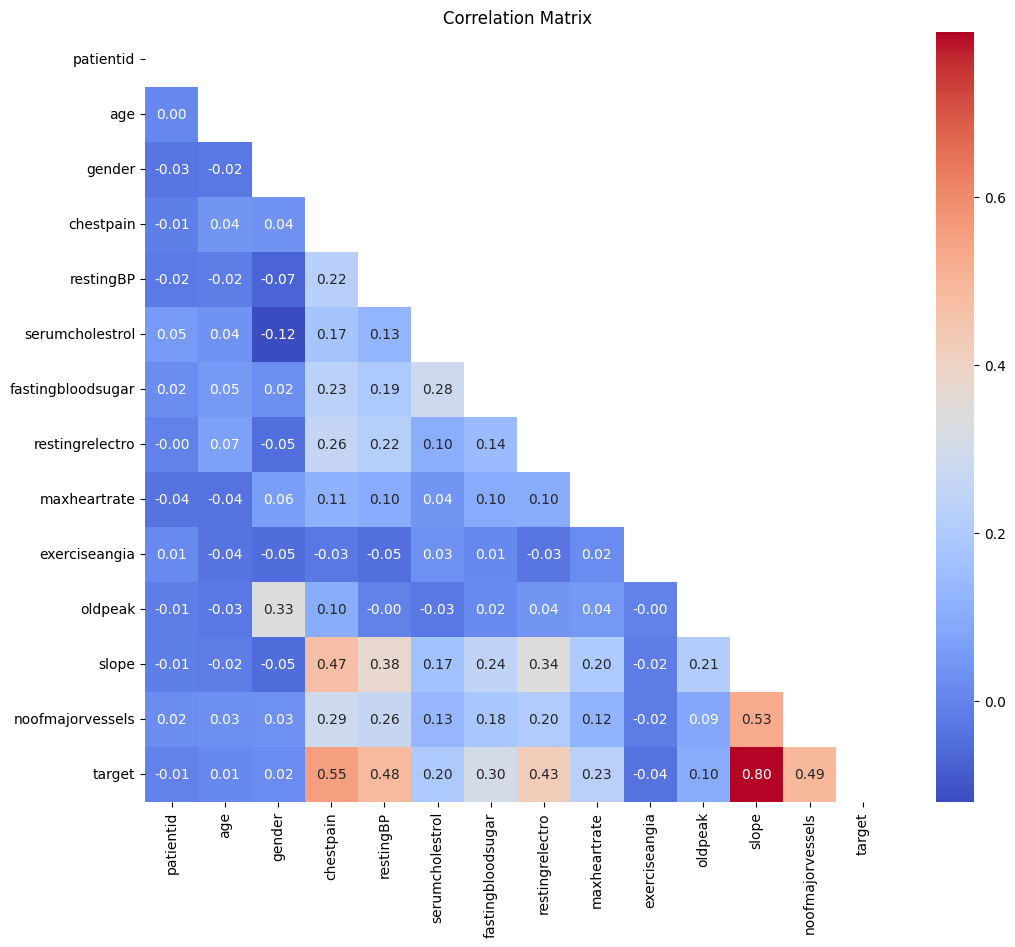

In [28]:
#check for correlations
plt.figure(figsize=(12,10))
correlation_matrix = data.corr()

#mask to display only one triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix = correlation_matrix.mask(mask)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

### Correlations
 From the correlation matrix, the slope has high correlation wtih target, follwed by chestpain then restingBp.

In [29]:
data.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [32]:
#Split the data into features and target
X = data.drop(columns=['patientid', 'target'], axis=1)
y = data['target']

In [33]:
#SPlit the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 12), (200, 12), (800,), (200,))

### Model Development


#### 4 Model Evaluation for the best


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/hom

[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   1.0s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   1.1s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.7s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.5s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.4s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1; total time=   0.6s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.7; total time=   0.3s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.7; total time=   0.3s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.7; total time=   0.5s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/hom

[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1; total time=   0.7s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.7; total time=   0.7s[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1; total time=   0.2s

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1; total time=   0.6s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/hom

[CV] END colsample_bytree=1, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.3s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.6s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1; total time=   0.4s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   1.5s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.3s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   1.4s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7; total time=   1.2s


/home/arhcellius-anami/datascience/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [12:30:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   7.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; 

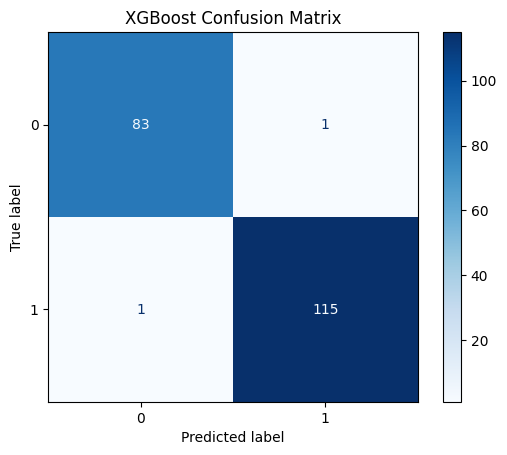


RandomForest Performance:
Accuracy: 0.9850, ROC-AUC: 0.9989, F1: 0.9871, Precision: 0.9829, Recall: 0.9914


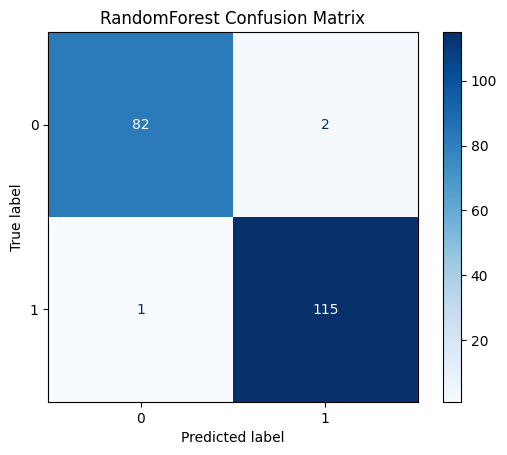


GradientBoosting Performance:
Accuracy: 0.9850, ROC-AUC: 0.9996, F1: 0.9871, Precision: 0.9829, Recall: 0.9914


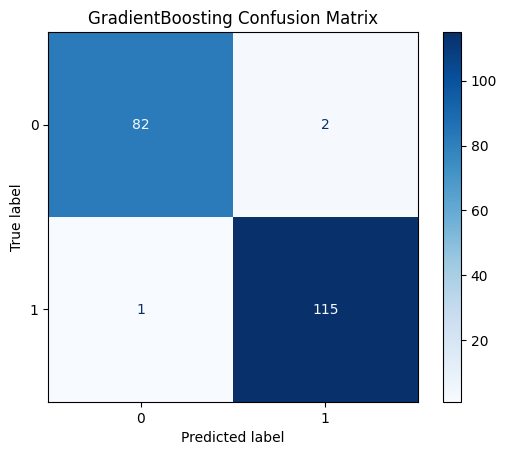


=== Model Comparison ===
              Model  Accuracy   ROC-AUC        F1  Precision    Recall
2  GradientBoosting     0.985  0.999589  0.987124   0.982906  0.991379
0           XGBoost     0.990  0.999487  0.991379   0.991379  0.991379
1      RandomForest     0.985  0.998871  0.987124   0.982906  0.991379


In [14]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score,
                             precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # for saving the model

# ------------------------------
# 1. Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# 2. Hyperparameter Grids for RandomizedSearchCV
# ------------------------------
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

gb_param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1],
    'max_features': ['sqrt', 'log2']
}

# ------------------------------
# 3. Define scoring metrics
# ------------------------------
scoring = {
    'Accuracy': 'accuracy',
    'ROC-AUC': 'roc_auc',
    'F1': 'f1'
}

# ------------------------------
# 4. RandomizedSearchCV helper
# ------------------------------
def run_random_search(model, param_grid, X_train, y_train, n_iter=20):
    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=n_iter,
        scoring='roc_auc',
        cv=3,
        n_jobs=-1,
        verbose=2,
        random_state=42
    )
    rs.fit(X_train, y_train)
    return rs

# ------------------------------
# 5. Run RandomizedSearchCV
# ------------------------------
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

xgb_rs = run_random_search(xgb_model, xgb_param_grid, X_train, y_train)
rf_rs = run_random_search(rf_model, rf_param_grid, X_train, y_train)
gb_rs = run_random_search(gb_model, gb_param_grid, X_train, y_train)

# ------------------------------
# 6. Evaluate models on test set
# ------------------------------
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}, ROC-AUC: {roc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    
    return {'Model': name, 'Accuracy': acc, 'ROC-AUC': roc, 'F1': f1, 'Precision': precision, 'Recall': recall}

results = []
results.append(evaluate_model(xgb_rs.best_estimator_, X_test, y_test, 'XGBoost'))
results.append(evaluate_model(rf_rs.best_estimator_, X_test, y_test, 'RandomForest'))
results.append(evaluate_model(gb_rs.best_estimator_, X_test, y_test, 'GradientBoosting'))

# Summary table
results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
print("\n=== Model Comparison ===")
print(results_df)


In [15]:
best_model = xgb_rs.best_estimator_ 
joblib.dump(best_model, 'heart_disease_model.pkl')
print("Saved best model as heart_disease_model.pkl")


Saved best model as heart_disease_model.pkl


In [16]:
import joblib
#open saved model
loaded_model = joblib.load('heart_disease_model.pkl')